In [55]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y = np.hstack([y, -y])
x = np.hstack([x, -x])

In [56]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1 = np.hstack([y1, -y1])
x1 = np.hstack([x1, -x1])

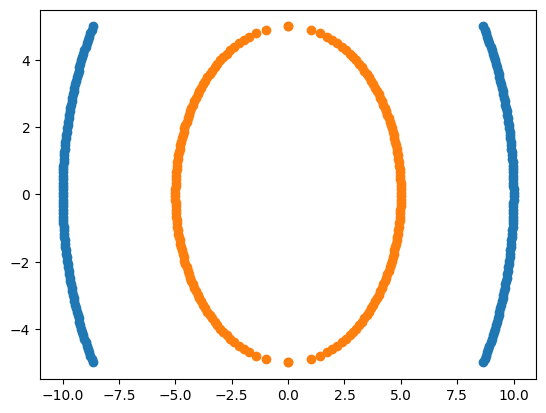

In [57]:
plt.scatter(y, x)
plt.scatter(y1, x1)

In [58]:
import pandas as pd
import numpy as np

df1 = pd.DataFrame(np.vstack([y, x]).T, columns=['X1', 'X2'])
df1['Y'] = 0

df2 = pd.DataFrame(np.vstack([y1, x1]).T, columns=['X1', 'X2'])
df2['Y'] = 1

df = pd.concat([df1, df2], ignore_index=True)
df.head()

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['X1', 'X2']], df['Y'], test_size=0.3, random_state=42)

In [60]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[25 37]
 [25 33]]
              precision    recall  f1-score   support

           0       0.50      0.40      0.45        62
           1       0.47      0.57      0.52        58

    accuracy                           0.48       120
   macro avg       0.49      0.49      0.48       120
weighted avg       0.49      0.48      0.48       120

Accuracy: 0.48333333333333334


In [45]:
y_train

157    0
109    0
17     0
347    1
24     0
      ..
71     0
106    0
270    1
348    1
102    0
Name: Y, Length: 280, dtype: int64

In [46]:
# we need to find components for the polynomial kernel
df['X1_Square'] = df['X1']**2
df['X2_Square'] = df['X2']**2
df['X1_X2'] = df['X1'] * df['X2']
df.head()

original_df = df.copy()
df.drop(['X1', 'X2'], axis=1, inplace=True)

In [47]:
# Independent and Dependent Features
X = df[['X1_Square', 'X2_Square', 'X1_X2']]
y = df['Y']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "browser"

fig = px.scatter_3d(
    df,
    x='X1',
    y='X2',
    z='X1_X2',
    color='Y',
    title='Polynomial Feature Space (X1, X2, X1·X2)'
)

fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Y', 'X1_Square', 'X2_Square', 'X1_X2'] but received: X1

In [30]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "browser"

fig = px.scatter_3d(
    df,
    x='X1_Square',
    y='X2_Square',
    z='X1_X2',
    color='Y',
    title='Polynomial Feature Space (X1, X2, X1·X2)'
)

fig.show()

In [50]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


[[62  0]
 [ 0 58]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        58

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Accuracy: 1.0
